Practical1-ID5059-220009855

Section 1. Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap 
from pandas_profiling import ProfileReport

In [2]:
#Read file
df = pd.read_csv('used_cars_data_small_1.csv')
df.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1G1JA6SG7F4183938,34.6 in,NaN,NaN,NaN,Hatchback,NaN,Wallingford,25.0,NaN,...,A,Automatic,t56201,LS Hatchback FWD,NaN,FWD,Front-Wheel Drive,99.4 in,68.3 in,2015
1,WAUG3AFC2JN003142,37.4 in,NaN,NaN,NaN,Sedan,NaN,Greenwich,20.0,NaN,...,A,8-Speed Automatic,t74094,3.0T quattro Premium Plus Sedan AWD,NaN,AWD,All-Wheel Drive,114.6 in,82.1 in,2018
2,3FA6P0HD7LR227144,38.3 in,NaN,NaN,NaN,Sedan,NaN,Detroit,23.0,NaN,...,A,Automatic,t86414,SE FWD,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2020
3,1FMCU9JD8HUD51651,37.3 in,NaN,NaN,NaN,SUV / Crossover,NaN,Detroit,22.0,NaN,...,A,6-Speed Automatic,t66220,Titanium AWD,NaN,AWD,All-Wheel Drive,105.9 in,81.8 in,2017
4,1C3BC6EV9AN122470,33.5 in,NaN,NaN,NaN,Convertible,NaN,Wallingford,16.0,NaN,...,A,Automatic,t36235,Limited Convertible FWD,NaN,FWD,Front-Wheel Drive,108.9 in,71.5 in,2010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      2383 non-null   object 
 1   back_legroom             2289 non-null   object 
 2   bed                      0 non-null      float64
 3   bed_height               124 non-null    object 
 4   bed_length               124 non-null    object 
 5   body_type                2380 non-null   object 
 6   cabin                    11 non-null     object 
 7   city                     2383 non-null   object 
 8   city_fuel_economy        2119 non-null   float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             2383 non-null   int64  
 11  dealer_zip               2383 non-null   int64  
 12  description              2371 non-null   object 
 13  engine_cylinders         2341 non-null   object 
 14  engine_displacement     

STEP1 : Data cleaning before splitting the data into training and testing sets

In [4]:
#delete empty columns at the beginning
cols_to_drop = ['bed', 'combine_fuel_economy', 'is_certified','vehicle_damage_category']
df = df.drop(cols_to_drop, axis=1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   2383 non-null   object 
 1   back_legroom          2289 non-null   object 
 2   bed_height            124 non-null    object 
 3   bed_length            124 non-null    object 
 4   body_type             2380 non-null   object 
 5   cabin                 11 non-null     object 
 6   city                  2383 non-null   object 
 7   city_fuel_economy     2119 non-null   float64
 8   daysonmarket          2383 non-null   int64  
 9   dealer_zip            2383 non-null   int64  
 10  description           2371 non-null   object 
 11  engine_cylinders      2341 non-null   object 
 12  engine_displacement   2264 non-null   float64
 13  engine_type           2341 non-null   object 
 14  exterior_color        2383 non-null   object 
 15  fleet                

In [6]:
#delete columns with serious data missing problem: non-null data less than 500
more_cols_to_drop = ['bed_height', 'bed_length', 'cabin','is_cpo','is_oemcpo', ]
df = df.drop(more_cols_to_drop, axis=1)


<AxesSubplot:>

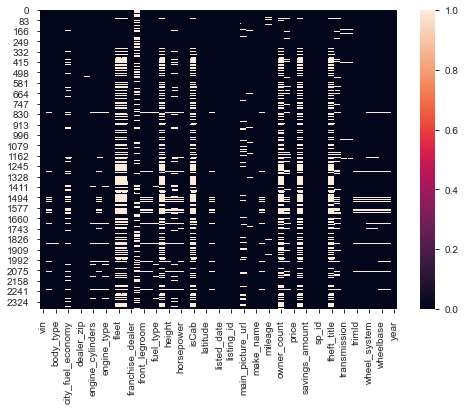

In [7]:
#visualize the missing data situation for each colunm
sns.heatmap(df.isnull())

In [8]:
# deal with missing data for numerical columns
df.fillna(df.median(), inplace=True)

<AxesSubplot:>

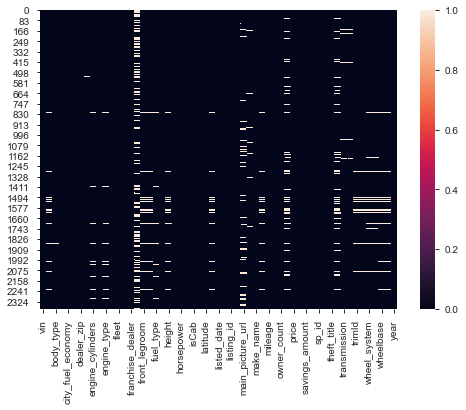

In [9]:
#check the effect of the last step - visualize the missing data situation for each colunm
sns.heatmap(df.isnull())

In [10]:
# using 'Python mode()' to deal with the missing data for categorical variables
# index 0: the most often value for each column
df.mode().iloc[0]

vin                                                     19UUB1F33HA005445
back_legroom                                                      38.2 in
body_type                                                 SUV / Crossover
city                                                             Stamford
city_fuel_economy                                                    21.0
daysonmarket                                                          4.0
dealer_zip                                                         6902.0
description             [!@@Additional Info@@!]Equipment Group 101A,3....
engine_cylinders                                                       I4
engine_displacement                                                2000.0
engine_type                                                            I4
exterior_color                                                      Black
fleet                                                               False
frame_damaged                         

In [11]:
#replace missing values with the most frequent value
df.fillna(df.mode().iloc[0], inplace=True)

<AxesSubplot:>

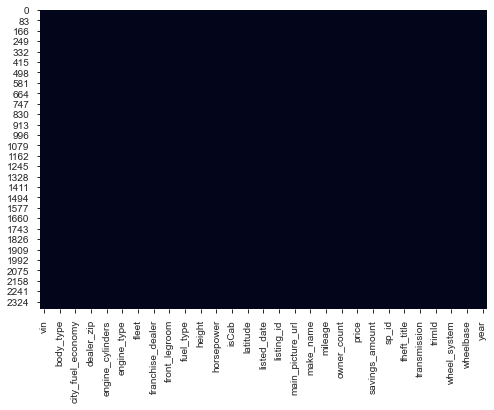

In [12]:
#check the effect of the last step - visualize the missing data situation for each colunm
sns.heatmap(df.isnull(),cbar=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   2383 non-null   object 
 1   back_legroom          2383 non-null   object 
 2   body_type             2383 non-null   object 
 3   city                  2383 non-null   object 
 4   city_fuel_economy     2383 non-null   float64
 5   daysonmarket          2383 non-null   int64  
 6   dealer_zip            2383 non-null   int64  
 7   description           2383 non-null   object 
 8   engine_cylinders      2383 non-null   object 
 9   engine_displacement   2383 non-null   float64
 10  engine_type           2383 non-null   object 
 11  exterior_color        2383 non-null   object 
 12  fleet                 2383 non-null   object 
 13  frame_damaged         2383 non-null   object 
 14  franchise_dealer      2383 non-null   bool   
 15  franchise_make       

Data cleaning & dealing with missing data done

STEP 2: Explore correlations

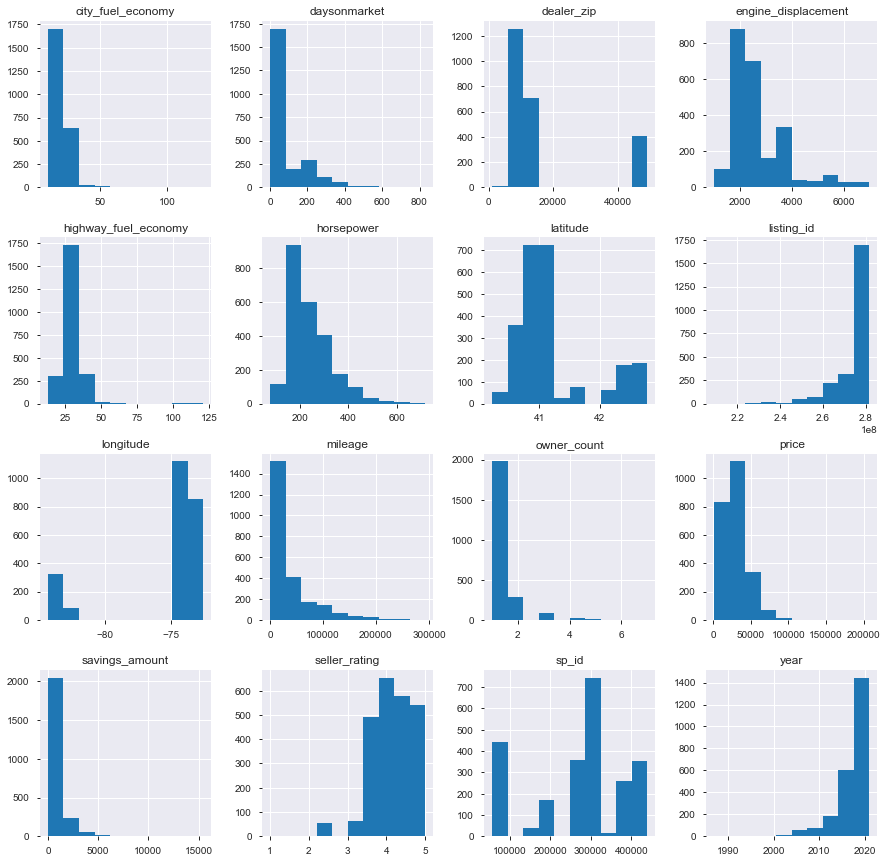

In [14]:
df.hist(figsize=(15,15))
plt.show()

From the above histogram we can see attribute price has similar trend as attributes:engine_displacement, horsepower, mileage, and opposite trend to attributes like year, we can see they may have correlations.

In [15]:
# calculate the correlation matrix
df.corr()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,year
city_fuel_economy,1.000000,0.092785,-0.019656,-0.374836,0.151443,0.939920,-0.387244,0.197674,0.042507,-0.084393,0.034150,-0.158982,-0.107098,-0.138144,-0.146985,-0.002234,-0.156509,0.168249
daysonmarket,0.092785,1.000000,-0.085320,-0.145564,0.125934,0.082414,-0.146818,0.329822,-0.093293,-0.997459,0.100849,-0.197089,-0.045462,-0.014663,-0.078595,-0.143532,-0.133222,0.166450
dealer_zip,-0.019656,-0.085320,1.000000,0.187050,-0.068381,-0.029813,0.091586,-0.052042,0.899418,0.082239,-0.982318,0.014584,-0.049263,-0.053928,0.035942,0.209513,-0.172080,0.024033
engine_displacement,-0.374836,-0.145564,0.187050,1.000000,-0.326279,-0.393945,0.738599,-0.370183,0.085468,0.137272,-0.209888,0.253619,0.167305,0.214157,0.316212,-0.084306,0.293732,-0.251983
franchise_dealer,0.151443,0.125934,-0.068381,-0.326279,1.000000,0.137758,-0.241892,0.570397,-0.058920,-0.118008,0.036338,-0.559928,-0.389255,0.167696,-0.281802,0.054273,-0.572842,0.528846
highway_fuel_economy,0.939920,0.082414,-0.029813,-0.393945,0.137758,1.000000,-0.405572,0.183541,0.026325,-0.074389,0.046911,-0.150812,-0.095816,-0.179958,-0.138697,0.004803,-0.142028,0.164568
horsepower,-0.387244,-0.146818,0.091586,0.738599,-0.241892,-0.405572,1.000000,-0.231046,-0.053998,0.139092,-0.131989,0.005584,0.026930,0.616799,0.265319,0.016749,0.203131,-0.010345
is_new,0.197674,0.329822,-0.052042,-0.370183,0.570397,0.183541,-0.231046,1.000000,-0.016420,-0.313223,0.050096,-0.612514,-0.341991,0.325253,-0.451843,0.075849,-0.534703,0.608751
latitude,0.042507,-0.093293,0.899418,0.085468,-0.058920,0.026325,-0.053998,-0.016420,1.000000,0.094395,-0.885250,0.113616,-0.020388,-0.162110,-0.025165,0.311750,-0.207586,-0.075007
listing_id,-0.084393,-0.997459,0.082239,0.137272,-0.118008,-0.074389,0.139092,-0.313223,0.094395,1.000000,-0.096792,0.187679,0.038574,0.019826,0.067803,0.148672,0.120928,-0.155269


<AxesSubplot:>

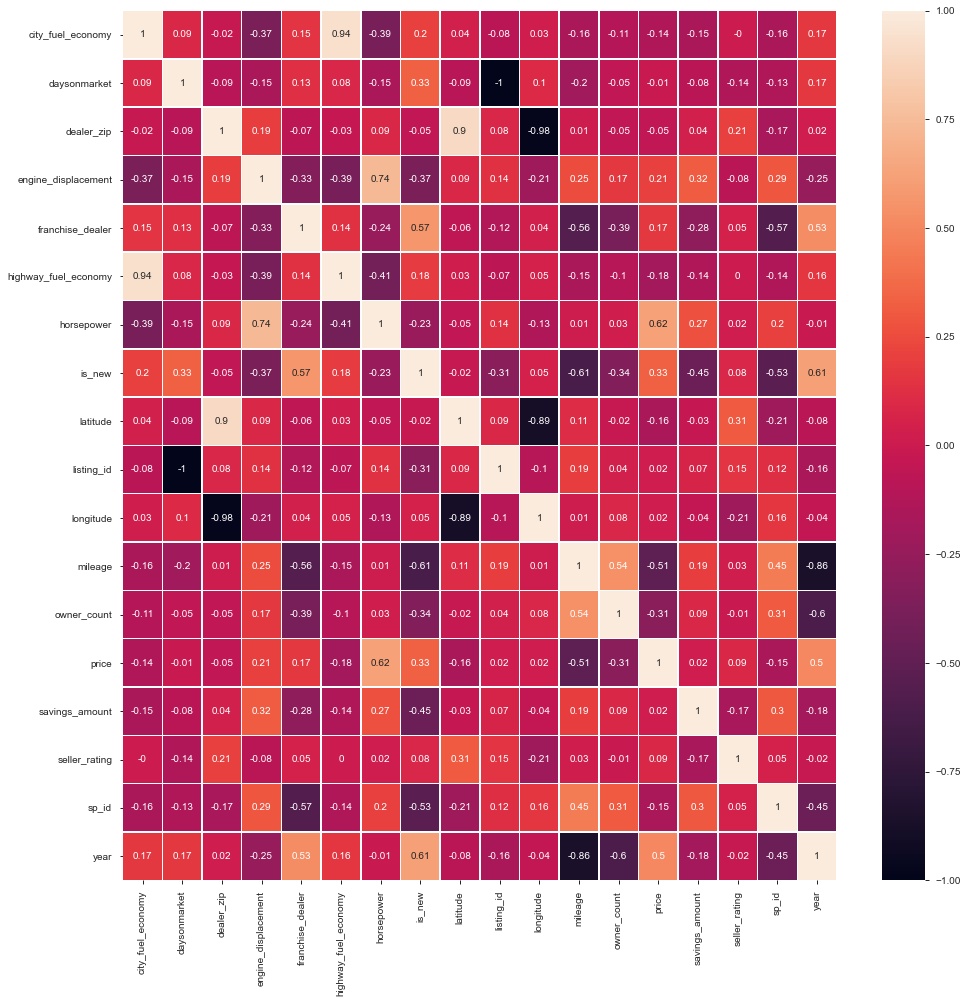

In [16]:
#using heatmap to show the correlationship between different attributes
plt.figure(figsize = (16,16))
sns.heatmap(np.round(df.corr(), 2),annot=True, linewidths=.5)

Section 2: Predictive Data Analysis

Step 1: Split into training and test sets 

In [17]:
#Create a test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=314)

In [18]:
#Verify the split
len(test_set) / len(df)

0.20016785564414605

In [19]:
#invent a new column, with coarser bins
df["price_category"] = pd.cut(df["price"], bins=[0, 15000, 30000, 45000, 60000, np.inf], labels=[1,2,3,4,5])

In [20]:
#verify if new feature present
df.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,...,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,price_category
0,1G1JA6SG7F4183938,34.6 in,Hatchback,Wallingford,25.0,54,6492,"[!@@Additional Info@@!]4 Cylinder Engine,ABS,6...",I4,1800.0,...,A,Automatic,t56201,LS Hatchback FWD,FWD,Front-Wheel Drive,99.4 in,68.3 in,2015,1
1,WAUG3AFC2JN003142,37.4 in,Sedan,Greenwich,20.0,12,6830,UNLIMITED MILE WARRANTY /// COLD WEATHER PACKA...,V6,3000.0,...,A,8-Speed Automatic,t74094,3.0T quattro Premium Plus Sedan AWD,AWD,All-Wheel Drive,114.6 in,82.1 in,2018,3
2,3FA6P0HD7LR227144,38.3 in,Sedan,Detroit,23.0,81,48207,This vehicle won't be on the lot long! Both pr...,I4,2500.0,...,A,Automatic,t86414,SE FWD,FWD,Front-Wheel Drive,112.2 in,83.5 in,2020,2
3,1FMCU9JD8HUD51651,37.3 in,SUV / Crossover,Detroit,22.0,42,48207,TAKE IT TO THE MAXX AND MARCH INTO SPRING WITH...,I4,2000.0,...,A,6-Speed Automatic,t66220,Titanium AWD,AWD,All-Wheel Drive,105.9 in,81.8 in,2017,2
4,1C3BC6EV9AN122470,33.5 in,Convertible,Wallingford,16.0,131,6492,Awesome Hardtop convertible!! Summer Fun!!,V6,3500.0,...,A,Automatic,t36235,Limited Convertible FWD,FWD,Front-Wheel Drive,108.9 in,71.5 in,2010,1


In [21]:
#stratified splitting
from sklearn.model_selection import StratifiedShuffleSplit
shuffled_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=314)

[(train_index, test_index)] = shuffled_data.split(df, df["price_category"])
stratified_train_set = df.loc[train_index]
stratified_test_set = df.loc[test_index]

In [22]:
#check stratified splitting by comparing the following 2 distributions
stratified_test_set["price_category"].value_counts() / len(stratified_test_set)

2    0.446541
3    0.211740
1    0.190776
4    0.102725
5    0.048218
Name: price_category, dtype: float64

In [23]:
stratified_train_set["price_category"].value_counts() / len(stratified_train_set)

2    0.446485
3    0.210388
1    0.192025
4    0.101784
5    0.049318
Name: price_category, dtype: float64

In [24]:
#distributions similar => split successful=> Now delete the extra column we have created, also delete the original dataset.
del(df)
stratified_train_set.drop(columns="price_category", inplace=True)
stratified_test_set.drop("price_category", axis=1, inplace=True)

stratified_train_set.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
985,1C4SDJCT6EC383439,38.6 in,SUV / Crossover,Green Brook,14.0,8,8812,2014 Dodge Durango R/T ***** NAVIGATION !!! **...,V8,5700.0,...,"390 lb-ft @ 4,250 RPM",A,8-Speed Automatic,t51865,R/T AWD,AWD,All-Wheel Drive,119.8 in,85.5 in,2014
2129,3C4NJDCB7HT627798,38.3 in,SUV / Crossover,Robbinsville,22.0,74,8691,People everywhere will love the way this 2017 ...,I4,2400.0,...,"175 lb-ft @ 3,900 RPM",A,9-Speed Automatic,t73230,Limited 4WD,4WD,Four-Wheel Drive,103.8 in,80 in,2017
1664,5NPEF4JA1LH059374,34.8 in,Sedan,West Nyack,27.0,28,10994,Manufacturer Incentives: Price includes: Guara...,I4,2500.0,...,"181 lb-ft @ 4,000 RPM",A,8-Speed Automatic,t85855,SEL FWD,FWD,Front-Wheel Drive,111.8 in,73.2 in,2020
1629,5LM5J9XC1LGL30032,40.1 in,SUV / Crossover,Wayne,21.0,1,7470,"[!@@Additional Info@@!]Equipment Group 800A,3....",V6,3000.0,...,"275 lb-ft @ 3,000 RPM",A,Automatic,t85099,Black Label AWD,AWD,All-Wheel Drive,119 in,89.9 in,2020
622,5LMCJ1D98LUL26062,38.6 in,SUV / Crossover,Wayne,21.0,1,7470,"[!@@Additional Info@@!]Equipment Group 101A,3....",I4,2000.0,...,"275 lb-ft @ 3,000 RPM",A,8-Speed Automatic,t86458,AWD,AWD,All-Wheel Drive,106.7 in,83 in,2020


In [25]:
df = stratified_train_set.copy()

In [26]:
# create X and Y =>df: training data the features=> df_labels: training data the labels
df_labels = df["price"].copy()
df.drop(columns="price", inplace=True)

Step 2: Define different sets of columns: numerical or categorical

In [27]:
# Get the list of numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Get the list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create dataframes for numerical and categorical columns respectively
df_num = df[num_cols]
df_cat = df[cat_cols]

Step 3: Create pipelines for numerical and categorical columns

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

Step 4: Create ColumnTransformer to apply pipeline for numerical and categorical columns

In [29]:
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ])

In [30]:
#df_prepared=>training data: the prepared features portion
df_prepared = col_trans.fit_transform(df)

In [31]:
pd.DataFrame(df_prepared).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Columns: 11029 entries, 0 to 11028
dtypes: float64(11029)
memory usage: 160.4 MB


In [32]:
pd.DataFrame(df_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,11019,11020,11021,11022,11023,11024,11025,11026,11027,11028
0,0.025862,0.009627,0.160166,0.783333,0.083333,0.441315,0.149062,0.989532,0.835739,0.317988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.094828,0.089049,0.157650,0.233333,0.157407,0.159624,0.000000,0.910233,0.824158,0.089136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.137931,0.033694,0.205535,0.250000,0.222222,0.176839,0.339017,0.964916,0.880072,0.000038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.086207,0.001203,0.132262,0.333333,0.138889,0.503912,0.267764,0.998654,0.853787,0.000057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.086207,0.001203,0.132262,0.166667,0.138889,0.269171,0.267764,0.998654,0.853787,0.000057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 5. Explore models: Linear Regression Model, Decision Tree Model & Random Forest Model

1 - Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(df_prepared, df_labels)

LinearRegression()

In [34]:
#make the predictions
predictions = linear_regression.predict(df_prepared).round()
predictions


array([21988., 19631., 28537., ..., 29529., 23748., 26995.])

In [35]:
# for the first test row the predicted price is 21988 whereas the actual value is 21988.
df_labels

985     21988.0
2129    19631.0
1664    28537.0
1629    78080.0
622     40057.0
         ...   
847     16391.0
848     18825.0
2225    29529.0
2096    23748.0
1392    26995.0
Name: price, Length: 1906, dtype: float64

In [36]:
#calculate the RMSE =>overfitting
from sklearn.metrics import mean_squared_error

linear_regression_price_predictions = linear_regression.predict(df_prepared)
linear_regression_mse = mean_squared_error(df_labels, linear_regression_price_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)
np.round(linear_regression_rmse)

0.0

In [37]:
np.round(linear_regression_rmse / df_labels.median(), 2)

0.0

2 - Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [39]:
#RMSE => overfitting
tree_regressor_price_predictions = tree_regressor.predict(df_prepared)
tree_regressor_mse = mean_squared_error(df_labels, tree_regressor_price_predictions)
tree_regressor_rmse = np.sqrt(tree_regressor_mse)
tree_regressor_rmse

0.0

In [40]:
#introduce K score: split the data into K sets
from sklearn.model_selection import cross_val_score

K = 10

tree_regressor_scores = cross_val_score(tree_regressor, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=K)
tree_regressor_rmse_scores = np.sqrt(-tree_regressor_scores)

In [41]:
#decision tree model score
def display_scores(scores):
    print("Scores:", np.round(scores))
    print("Mean:", np.round(scores.mean()))
    print("Standard deviation:", np.round(scores.std()))

display_scores(tree_regressor_rmse_scores)

Scores: [12757.  5034.  7294.  6950.  7549. 11883. 10085.  8406.  8407.  4687.]
Mean: 8305.0
Standard deviation: 2511.0


In [42]:
#linear regression model score
linear_regression_scores = cross_val_score(linear_regression, df_prepared, df_labels,
                                           scoring="neg_mean_squared_error", cv=K)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)
display_scores(linear_regression_rmse_scores)

Scores: [13643.  4624.  6173.  5271.  6418. 13444.  6104.  7237.  5752.  4706.]
Mean: 7337.0
Standard deviation: 3191.0


3 - Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(df_prepared, df_labels)

forest_regressor_price_predictions = forest_regressor.predict(df_prepared)
forest_regressor_mse = mean_squared_error(df_labels, forest_regressor_price_predictions)
forest_regressor_rmse = np.sqrt(forest_regressor_mse)
forest_regressor_rmse.round()

2482.0

In [44]:
forest_regressor_scores = cross_val_score(forest_regressor, df_prepared, df_labels,
                                          scoring="neg_mean_squared_error", cv=K)
forest_regressor_rmse_scores = np.sqrt(-forest_regressor_scores)
display_scores(forest_regressor_rmse_scores)

Scores: [12166.  3261.  6004.  4719.  6285. 10021.  5984.  7137.  5641.  3508.]
Mean: 6473.0
Standard deviation: 2623.0
